<h1 align="center">Case 3 - Retail Score Analysis</h1>

<div align="right">Machine Learning</div>

- Jose Abal Caamaño
- Jesús Platero Acevedo

In this notebook, we are going to continue with the practice and **will be realize the models**.

# Index:
## 1. Transformations
### 1.1. Libraries
### 1.2. Creation of the functions
### 1.3. Read and load the data
### 1.4. Previous transformations
## 2. Models
### 2.1. Libraries
### 2.2 Creation of the functions
### 2.3. Pipeline creation
### 2.4. Creation of the models
 - Base Model
 - Lasso
 - SVM
 - Random Forest
 - XGBoost
 - LightGBM
 - AdaBoost

### 2.5. Select the model to optimizer

# 1. Transformations

## 1.1. Libraries

In [1]:
from imblearn.over_sampling import SMOTE, KMeansSMOTE, BorderlineSMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline 

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

## 1.2. Creation of the functions 

In [103]:
def cargar_modelo(ruta):
    return pickle.load(open(ruta, 'rb'))

## 1.3. Read and load the data 

In [2]:
train = pd.read_parquet('../data/processed/restaurant.parquet')
xtest = pd.read_parquet('../data/processed/xtest.parquet')
xtrain = pd.read_parquet('../data/processed/xtrain.parquet')
ytest = pd.read_parquet('../data/processed/ytest.parquet')
ytrain = pd.read_parquet('../data/processed/ytrain.parquet')
train.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,bubble tea,tapas/small plates,food stands,cupcakes,noodles,wineries,cuban,halal,spanish,acai bowls
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,1,0,0,0,0,0,0,0,0,0
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0,0,0,0,0,0,0,0,0,0
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,0,0,0,0,0,0,0,0,0,0
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,...,0,0,0,0,0,0,0,0,0,0
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,...,0,0,0,0,0,0,0,0,0,0


## 1.4. Previous transformations

In [4]:
train = train.assign(train=train['stars'] >= 4)

Here, we modify the star variable so that **they are greater or equal than 4**.

In [7]:
train['train'] = train['train'].astype(int)

In [8]:
train.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,tapas/small plates,food stands,cupcakes,noodles,wineries,cuban,halal,spanish,acai bowls,train
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,0,0,0,0,0,0,0,0,0,1
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0,0,0,0,0,0,0,0,0,1
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,0,0,0,0,0,0,0,0,0,0
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,...,0,0,0,0,0,0,0,0,0,0
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,...,0,0,0,0,0,0,0,0,0,1


In [9]:
train = train.drop(train[train['train'] == 0].index)

In [10]:
train.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,tapas/small plates,food stands,cupcakes,noodles,wineries,cuban,halal,spanish,acai bowls,train
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,0,0,0,0,0,0,0,0,0,1
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0,0,0,0,0,0,0,0,0,1
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,...,0,0,0,0,0,0,0,0,0,1
5,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,...,0,0,0,0,0,0,0,0,0,1
6,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,0,0,0,0,0,0,0,0,0,1


In [13]:
train = train.drop(columns=['train'])
train.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,bubble tea,tapas/small plates,food stands,cupcakes,noodles,wineries,cuban,halal,spanish,acai bowls
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,1,0,0,0,0,0,0,0,0,0
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0,0,0,0,0,0,0,0,0,0
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,...,0,0,0,0,0,0,0,0,0,0
5,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,...,0,0,0,0,0,0,0,0,0,0
6,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train.to_parquet("../data/processed/train.parquet")

# 2. Models

## 2.1. Libraries 

In [14]:
from imblearn.over_sampling import SMOTE, KMeansSMOTE, BorderlineSMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline 

from sklearn import svm


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, \
                            classification_report, confusion_matrix
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import lightgbm as lgb
from sklearn import metrics, linear_model
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.metrics import plot_confusion_matrix, fbeta_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression,LogisticRegressionCV, LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import pickle
import warnings
warnings.filterwarnings('ignore')

## 2.2 Creation of the functions

In [15]:
def evaluate_model(yval, ypred, ypred_proba = None):
    if ypred_proba is not None:
        print('ROC-AUC score of the model: {}'.format(roc_auc_score(y_val, ypred_proba[:, 1])))
        print(f'\nF2 Score: {fbeta_score(y_val, ypred, beta=2, average="macro")}\n')
        print(f'R2 Score: {r2_score(y_val, ypred)}\n')
        print('Accuracy of the model: {}\n'.format(accuracy_score(y_val, ypred)))
        print('Classification report: \n{}\n'.format(classification_report(y_val, ypred)))

def load_model(ruta):
    return pickle.load(open(ruta, 'rb'))

In [16]:
path = '../data/processed/'
new_file = 'train.parquet'

In [20]:
train = (pd.read_parquet(path+new_file)
        
)

In [21]:
train.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,bubble tea,tapas/small plates,food stands,cupcakes,noodles,wineries,cuban,halal,spanish,acai bowls
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,1,0,0,0,0,0,0,0,0,0
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,0,0,0,0,0,0,0,0,0,0
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,...,0,0,0,0,0,0,0,0,0,0
5,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,...,0,0,0,0,0,0,0,0,0,0
6,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,0,0,0,0,0,0,0,0,0,0


## 2.3. Pipeline creation

In [22]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [24]:
numeric = train.select_dtypes(include=['int64', 'float64']).drop(['is_open'], axis=1).columns

categorical = train.select_dtypes(include=['object']).columns

In [25]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric),
        ('cat', categorical_transformer, categorical)])

In [26]:
#Save the preprocessor
with open('../models/preprocessor.pickle', 'wb') as f:
    pickle.dump(preprocessor, f)

In [28]:
X = train.drop('is_open',axis = 1)  #data
Y = train.is_open #target variable

In [29]:
#Parameters
seed = 12345
test_size = 0.25

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0, stratify = Y)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.25, random_state = 0, stratify = y_train)

In [31]:
x_train.to_parquet("../data/xtrain.parquet")
x_test.to_parquet("../data/xtest.parquet")
pd.DataFrame(y_train).to_parquet("../data/ytrain.parquet")
pd.DataFrame(y_test).to_parquet("../data/ytest.parquet")

In [32]:
x_train = pd.read_parquet("../data/xtrain.parquet")
y_train = pd.read_parquet("../data/ytrain.parquet")['is_open']
x_test = pd.read_parquet("../data/xtest.parquet")
y_test = pd.read_parquet("../data/ytest.parquet")['is_open']

## 2.4. Creation of the models

### - Base Model

In [33]:
baseModel = Pipeline(steps=[
    ('preprocesador', preprocessor),
    ('clasificador', DummyClassifier(strategy='most_frequent', random_state=0))])

In [34]:
baseModel.fit(x_train, y_train)

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['latitude', 'longitude', 'stars', 'review_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code'], dtype='object'))])),
                ('clasificador',
                 DummyClassifier(random_state=0, strategy='most_frequent'))])

In [35]:
with open('../models/base_model.pickle', 'wb') as f:
    pickle.dump(baseModel, f)

In [36]:
load_model('../models/base_model.pickle')

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['latitude', 'longitude', 'stars', 'review_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code'], dtype='object'))])),
                ('clasificador',
                 DummyClassifier(random_state=0, strategy='most_frequent'))])

In [37]:
y_pred = baseModel.predict(x_val)
y_pred_proba = baseModel.predict_proba(x_val)
evaluate_model(y_val,y_pred,y_pred_proba)

ROC-AUC score of the model: 0.5

F2 Score: 0.4626063591580833

R2 Score: -0.40416263310745393

Accuracy of the model: 0.7121682178559118

Classification report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       835
           1       0.71      1.00      0.83      2066

    accuracy                           0.71      2901
   macro avg       0.36      0.50      0.42      2901
weighted avg       0.51      0.71      0.59      2901




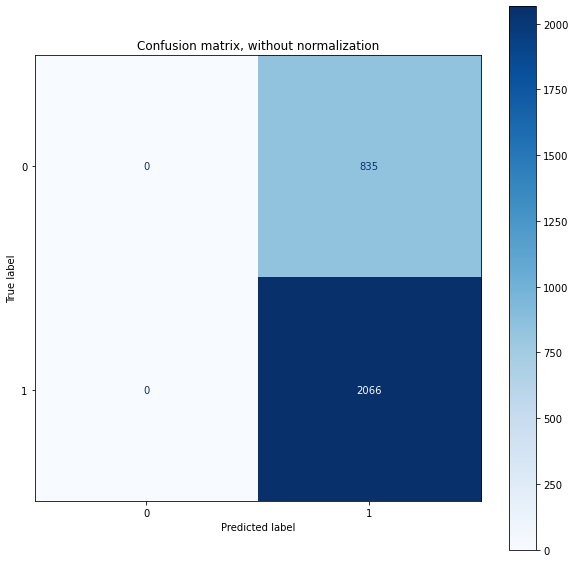

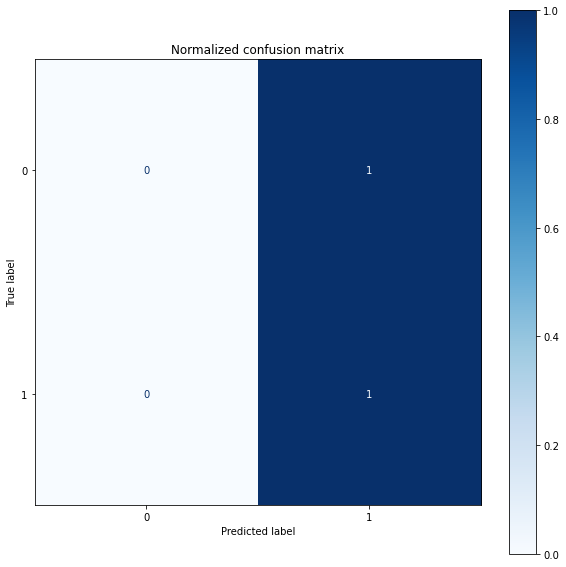

In [38]:
 titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
        fig, ax = plt.subplots(figsize=(10, 10))
        disp = ConfusionMatrixDisplay.from_predictions(y_val, y_pred,
                                                       cmap=plt.cm.Blues,
                                                       normalize=normalize,
                                                       ax=ax)
        ax.set_title(title)

### - Logistic regression(LASSO)

In [39]:
clf = Pipeline(steps=[
    ('preprocesador', preprocessor), 
    ('clasificador', LogisticRegressionCV(penalty='l2', random_state=0))])

In [40]:
clf.fit(x_train, y_train)

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['latitude', 'longitude', 'stars', 'review_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code'], dtype='object'))])),
                ('clasificador', LogisticRegressionCV(random_state=0))])

In [41]:
with open('../models/LRlasso.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [42]:
load_model('../models/LRlasso.pickle')

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['latitude', 'longitude', 'stars', 'review_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code'], dtype='object'))])),
                ('clasificador', LogisticRegressionCV(random_state=0))])

In [43]:
y_pred = clf.predict(x_val)
y_pred_proba = clf.predict_proba(x_val)
evaluate_model(y_val, y_pred, y_pred_proba)

ROC-AUC score of the model: 0.6411298409956466

F2 Score: 0.5004016304290713

R2 Score: -0.3738932589805868

Accuracy of the model: 0.7183729748362634

Classification report: 
              precision    recall  f1-score   support

           0       0.59      0.07      0.13       835
           1       0.72      0.98      0.83      2066

    accuracy                           0.72      2901
   macro avg       0.66      0.53      0.48      2901
weighted avg       0.68      0.72      0.63      2901




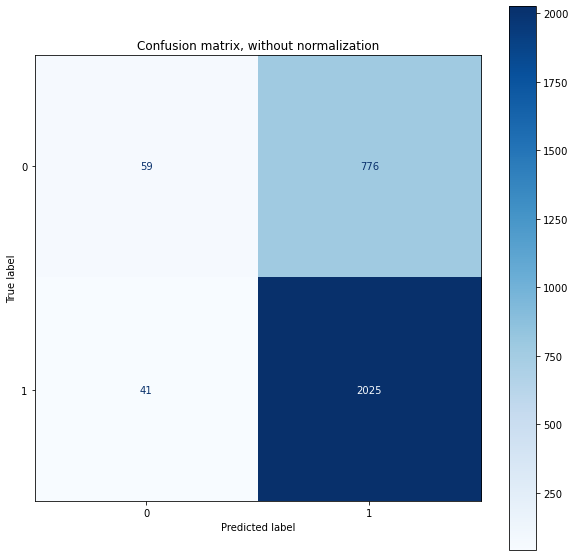

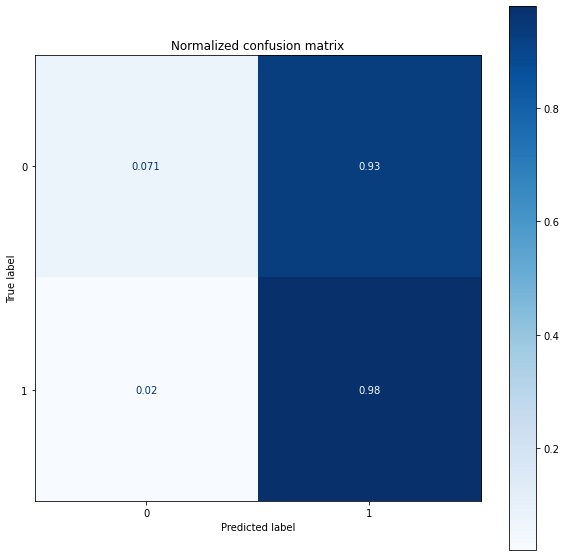

In [44]:
 titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
        fig, ax = plt.subplots(figsize=(10, 10))
        disp = ConfusionMatrixDisplay.from_predictions(y_val, y_pred,
                                                       cmap=plt.cm.Blues,
                                                       normalize=normalize,
                                                       ax=ax)
        ax.set_title(title)

### - Generalized Linear Models (LinearRegression)

In [45]:
clf = Pipeline(steps=[
    ('preprocesador', preprocessor), 
    ('clasificador', LinearRegression())])

In [46]:
clf.fit(x_train, y_train)

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['latitude', 'longitude', 'stars', 'review_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code'], dtype='object'))])),
                ('clasificador', LinearRegression())])

In [47]:
with open('../models/GLM.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [48]:
load_model('../models/GLM.pickle')

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['latitude', 'longitude', 'stars', 'review_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code'], dtype='object'))])),
                ('clasificador', LinearRegression())])

In [49]:
ypred = clf.predict(x_val)

rmse = mean_squared_error(
        y_true  = y_val,
        y_pred  = y_pred,
        squared = False
       )
print("")
print(f"El error (rmse) del test es: {rmse}")
print(f'El coeficiente de determinacion (R2) del test es de : {r2_score(y_val, y_pred)}\n')


El error (rmse) del test es: 0.5306854295755035
El coeficiente de determinacion (R2) del test es de : -0.3738932589805868



### - Support Vector Machine (SVM)

In [50]:
clf = Pipeline(steps=[
    ('preprocesador', preprocessor),
    ('clasificador', SVC(probability = True, random_state = 0))])

In [51]:
clf.fit(x_train, y_train)

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['latitude', 'longitude', 'stars', 'review_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code'], dtype='object'))])),
                ('clasificador', SVC(probability=True, random_state=0))])

In [52]:
with open('../models/SVM.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [53]:
load_model('../models/SVM.pickle')

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['latitude', 'longitude', 'stars', 'review_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code'], dtype='object'))])),
                ('clasificador', SVC(probability=True, random_state=0))])

In [54]:
y_pred = clf.predict(x_val)
y_pred_proba = clf.predict_proba(x_val)
evaluate_model(y_val,y_pred,y_pred_proba)

ROC-AUC score of the model: 0.6391038832306346

F2 Score: 0.47510339240237653

R2 Score: -0.39407284173183155

Accuracy of the model: 0.7142364701826956

Classification report: 
              precision    recall  f1-score   support

           0       0.59      0.02      0.04       835
           1       0.72      0.99      0.83      2066

    accuracy                           0.71      2901
   macro avg       0.65      0.51      0.44      2901
weighted avg       0.68      0.71      0.61      2901




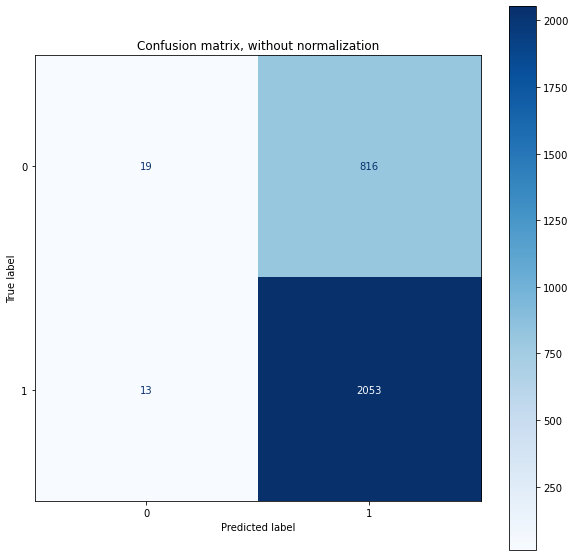

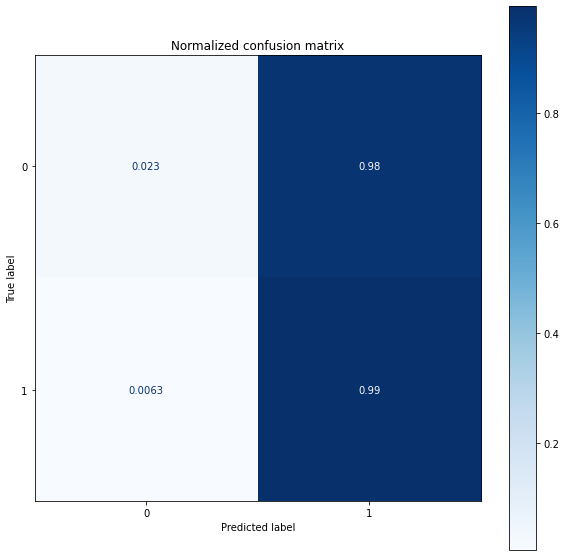

In [55]:
titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
        fig, ax = plt.subplots(figsize=(10, 10))
        disp = ConfusionMatrixDisplay.from_predictions(y_val, y_pred,
                                                       cmap=plt.cm.Blues,
                                                       normalize=normalize,
                                                       ax=ax)
        ax.set_title(title)

### - Random Forest

In [56]:
clf = Pipeline(steps=[
    ('preprocesador', preprocessor), 
    ('clasificador', RandomForestClassifier(random_state=0))])

In [57]:
clf.fit(x_train, y_train)

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['latitude', 'longitude', 'stars', 'review_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code'], dtype='object'))])),
                ('clasificador', RandomForestClassifier(random_state=0))])

In [58]:
with open('../models/RandomForest.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [59]:
load_model('../models/RandomForest.pickle')

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['latitude', 'longitude', 'stars', 'review_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code'], dtype='object'))])),
                ('clasificador', RandomForestClassifier(random_state=0))])

In [60]:
y_pred = clf.predict(x_val)
y_pred_proba = clf.predict_proba(x_val)
evaluate_model(y_val,y_pred,y_pred_proba)

ROC-AUC score of the model: 0.6140362063868391

F2 Score: 0.47328948264935844

R2 Score: -0.38902794604402047

Accuracy of the model: 0.7152705963460876

Classification report: 
              precision    recall  f1-score   support

           0       0.71      0.02      0.04       835
           1       0.72      1.00      0.83      2066

    accuracy                           0.72      2901
   macro avg       0.71      0.51      0.43      2901
weighted avg       0.71      0.72      0.60      2901




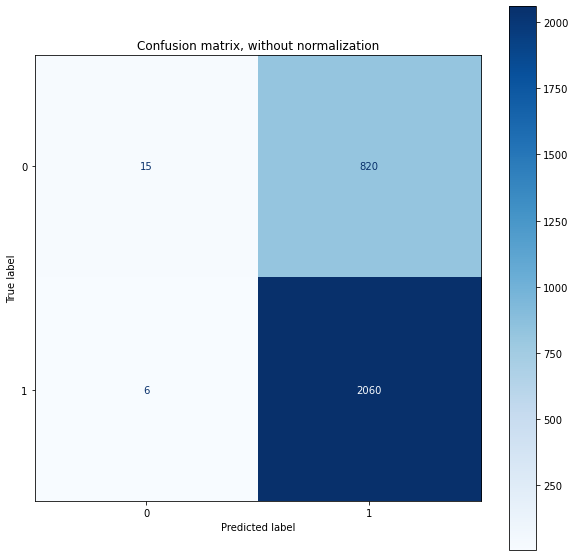

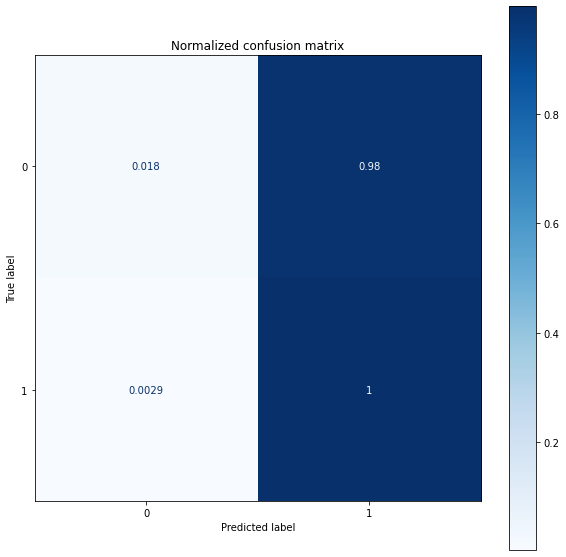

In [61]:
titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
        fig, ax = plt.subplots(figsize=(10, 10))
        disp = ConfusionMatrixDisplay.from_predictions(y_val, y_pred,
                                                       cmap=plt.cm.Blues,
                                                       normalize=normalize,
                                                       ax=ax)
        ax.set_title(title)

### - XGBoost

In [62]:
clf = Pipeline(steps=[
    ('preprocesador', preprocessor),
    ('clasificador', XGBClassifier(random_state=0))])

In [63]:
clf.fit(x_train, y_train)

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['latitude', 'longitude', 'stars', 'review_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(h...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [64]:
with open('../models/XGBoost.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [65]:
load_model('../models/XGBoost.pickle')

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['latitude', 'longitude', 'stars', 'review_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(h...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=0, ...))])

In [66]:
y_pred = clf.predict(x_val)
y_pred_proba = clf.predict_proba(x_val)
evaluate_model(y_val,y_pred,y_pred_proba)

ROC-AUC score of the model: 0.6518419115302793

F2 Score: 0.5267482080249727

R2 Score: -0.4108891606912022

Accuracy of the model: 0.7107893829713892

Classification report: 
              precision    recall  f1-score   support

           0       0.49      0.14      0.22       835
           1       0.73      0.94      0.82      2066

    accuracy                           0.71      2901
   macro avg       0.61      0.54      0.52      2901
weighted avg       0.66      0.71      0.65      2901




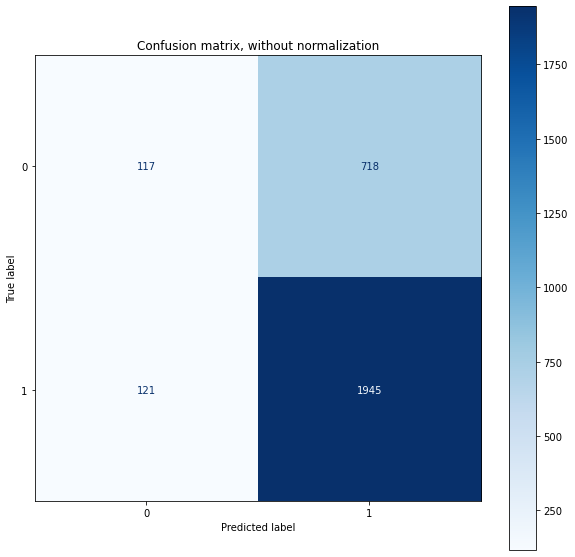

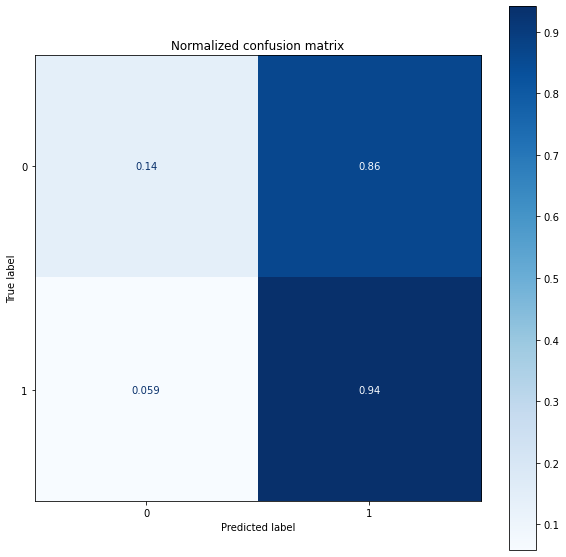

In [67]:
titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
        fig, ax = plt.subplots(figsize=(10, 10))
        disp = ConfusionMatrixDisplay.from_predictions(y_val, y_pred,
                                                       cmap=plt.cm.Blues,
                                                       normalize=normalize,
                                                       ax=ax)
        ax.set_title(title)

### - LightGBM

In [70]:
clf = Pipeline(steps=[
    ('preprocesador', preprocessor),
    ('clasificador', lgb.LGBMClassifier(random_state=0))])

In [71]:
clf.fit(x_train, y_train)

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['latitude', 'longitude', 'stars', 'review_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code'], dtype='object'))])),
                ('clasificador', LGBMClassifier(random_state=0))])

In [72]:
with open('../models/LightGBM.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [73]:
load_model('../models/LightGBM.pickle')

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['latitude', 'longitude', 'stars', 'review_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code'], dtype='object'))])),
                ('clasificador', LGBMClassifier(random_state=0))])

In [74]:
y_pred = clf.predict(x_val)
y_pred_proba = clf.predict_proba(x_val)
evaluate_model(y_val,y_pred,y_pred_proba)

ROC-AUC score of the model: 0.6464964552985026

F2 Score: 0.5171927515031733

R2 Score: -0.4344320072343213

Accuracy of the model: 0.7059634608755602

Classification report: 
              precision    recall  f1-score   support

           0       0.46      0.12      0.20       835
           1       0.73      0.94      0.82      2066

    accuracy                           0.71      2901
   macro avg       0.59      0.53      0.51      2901
weighted avg       0.65      0.71      0.64      2901




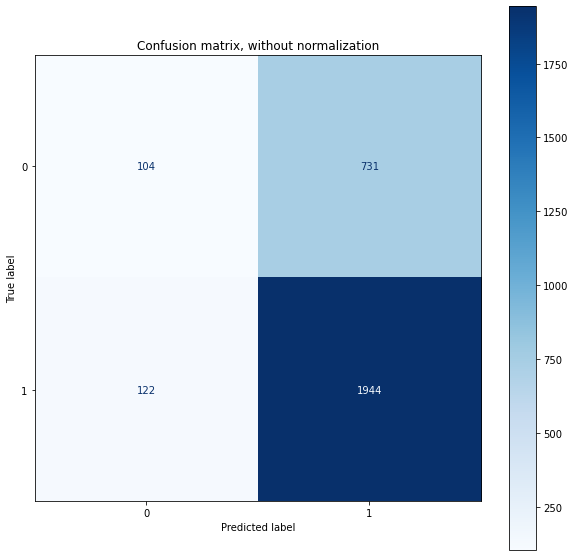

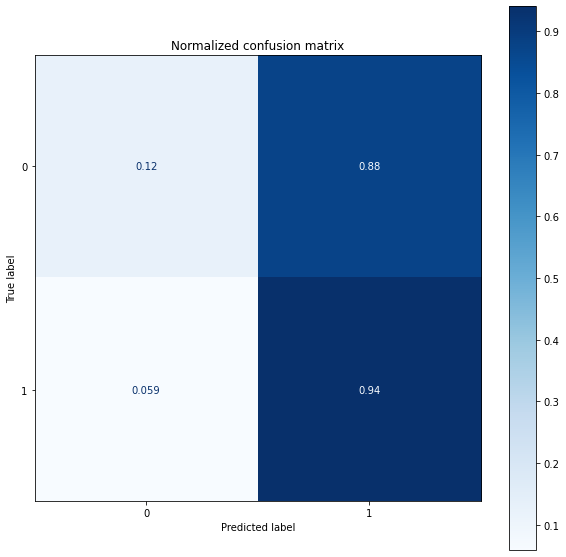

In [75]:
titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
        fig, ax = plt.subplots(figsize=(10, 10))
        disp = ConfusionMatrixDisplay.from_predictions(y_val, y_pred,
                                                       cmap=plt.cm.Blues,
                                                       normalize=normalize,
                                                       ax=ax)
        ax.set_title(title)

### - AdaBoost

In [76]:
clf = Pipeline(steps=[
    ('preprocesador', preprocessor),
    ('clasificador', AdaBoostClassifier(random_state=0))])

In [77]:
clf.fit(x_train, y_train)

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['latitude', 'longitude', 'stars', 'review_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code'], dtype='object'))])),
                ('clasificador', AdaBoostClassifier(random_state=0))])

In [78]:
with open('../models/AdaBoost.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [79]:
load_model('../models/AdaBoost.pickle')

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['latitude', 'longitude', 'stars', 'review_count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code'], dtype='object'))])),
                ('clasificador', AdaBoostClassifier(random_state=0))])

In [80]:
y_pred = clf.predict(x_val)
y_pred_proba = clf.predict_proba(x_val)
evaluate_model(y_val,y_pred,y_pred_proba)

ROC-AUC score of the model: 0.6403290224971163

F2 Score: 0.5059968050582385

R2 Score: -0.42770547965057304

Accuracy of the model: 0.7073422957600828

Classification report: 
              precision    recall  f1-score   support

           0       0.46      0.10      0.16       835
           1       0.72      0.95      0.82      2066

    accuracy                           0.71      2901
   macro avg       0.59      0.53      0.49      2901
weighted avg       0.65      0.71      0.63      2901




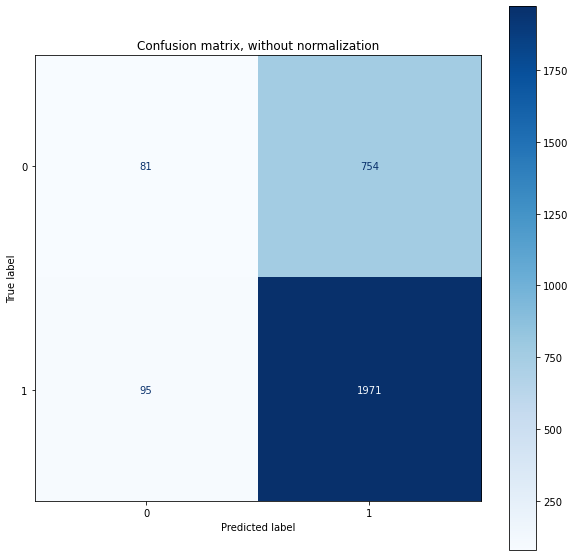

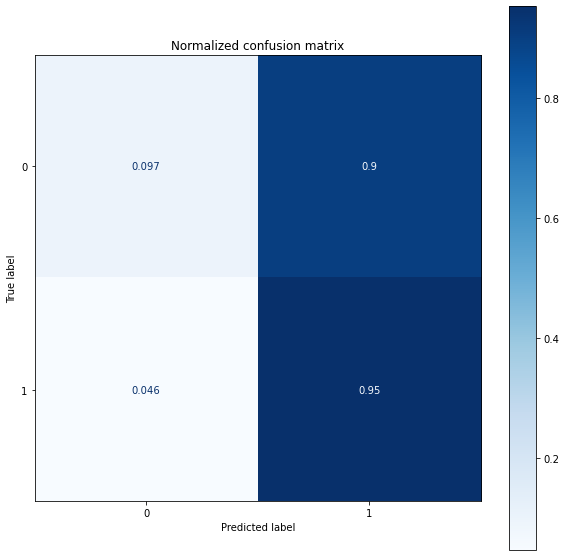

In [81]:
titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
        fig, ax = plt.subplots(figsize=(10, 10))
        disp = ConfusionMatrixDisplay.from_predictions(y_val, y_pred,
                                                       cmap=plt.cm.Blues,
                                                       normalize=normalize,
                                                       ax=ax)
        ax.set_title(title)

### 2.5. Select the model to optimizer

In [3]:
models = {'Model': ['Base Model','Lasso','SVM','Random Forest', 'XGBoost', 'LightGBM', 'AdaBoost'],

                'ROC-AUC': ['0.5000', '0.6411', '0.6391', '0.6140', '0.6518', '0.6465', '0.6403'],

                'F2 Score': ['0.4626', '0.5004', '0.4751', '0.4732', '0.5267', '0.5172', '0.5059'],

                'R2 Score': ['-0.4041', '-0.3738', '-0.3940', '-0.3890', '-0.4109', '-0.4344', '-0.4277'],

                'Accuracy': ['0.7121', '0.7183', '0.7142', '0.7152', '0.71079', '0.7059', '0.7073']}

table = pd.DataFrame(models, columns=['Model', 'ROC-AUC', 'F2 Score','R2 Score', 'Accuracy'])

In [4]:
table 

,Model,ROC-AUC,F2 Score,R2 Score,Accuracy
0,Base Model,0.5000,0.4626,-0.4041,0.7121
1,Lasso,0.6411,0.5004,-0.3738,0.7183
2,SVM,0.6391,0.4751,-0.3940,0.7142
3,Random Forest,0.6140,0.4732,-0.3890,0.7152
4,XGBoost,0.6518,0.5267,-0.4109,0.71079
5,LightGBM,0.6465,0.5172,-0.4344,0.7059
6,AdaBoost,0.6403,0.5059,-0.4277,0.7073


After the realization of all this models, we obtain that **the best model is XGBoost** and we pass to opitimizer it.